In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['wine_type'] = wine.target

In [4]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [6]:
data = data.sample(frac=1)

In [36]:
x = data.drop(labels=['wine_type'], axis=1)
y = data.wine_type

In [37]:
X = StandardScaler().fit_transform(x)

In [38]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=322)

In [10]:
# fit
dtc = DecisionTreeClassifier(random_state=322)

In [11]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=322)

In [12]:
dtc.score(X_test, y_test)

0.9074074074074074

In [13]:
np.mean(cross_val_score(dtc, X, y, cv=5))

0.9384126984126985

[Text(722.7692307692307, 534.6, 'proline <= 0.026\ngini = 0.659\nsamples = 124\nvalue = [39, 50, 35]'),
 Text(385.4769230769231, 437.40000000000003, 'flavanoids <= -0.797\ngini = 0.505\nsamples = 84\nvalue = [2, 49, 33]'),
 Text(192.73846153846154, 340.20000000000005, 'alcalinity_of_ash <= -1.635\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(96.36923076923077, 243.00000000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(289.10769230769233, 243.00000000000006, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(578.2153846153847, 340.20000000000005, 'hue <= -1.393\ngini = 0.203\nsamples = 54\nvalue = [2, 48, 4]'),
 Text(481.8461538461538, 243.00000000000006, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(674.5846153846154, 243.00000000000006, 'alcohol <= 0.215\ngini = 0.077\nsamples = 50\nvalue = [2, 48, 0]'),
 Text(578.2153846153847, 145.8, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]'),
 Text(770.9538461538461, 145.8, 'alcohol <= 0.357\ngini = 0.48\nsa

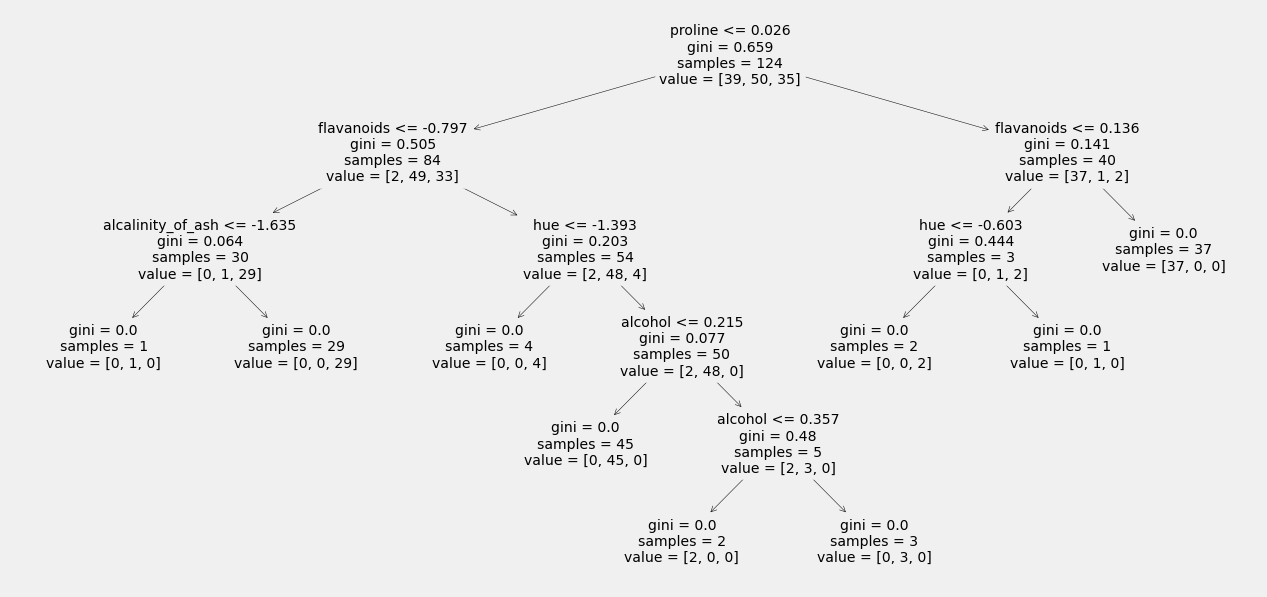

In [15]:
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=data.columns[:-1], fontsize=14)

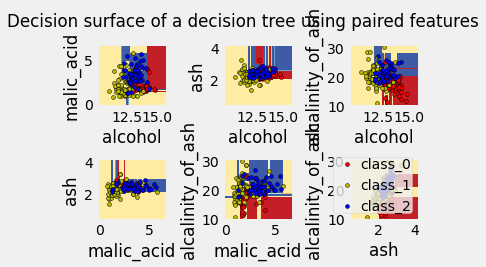

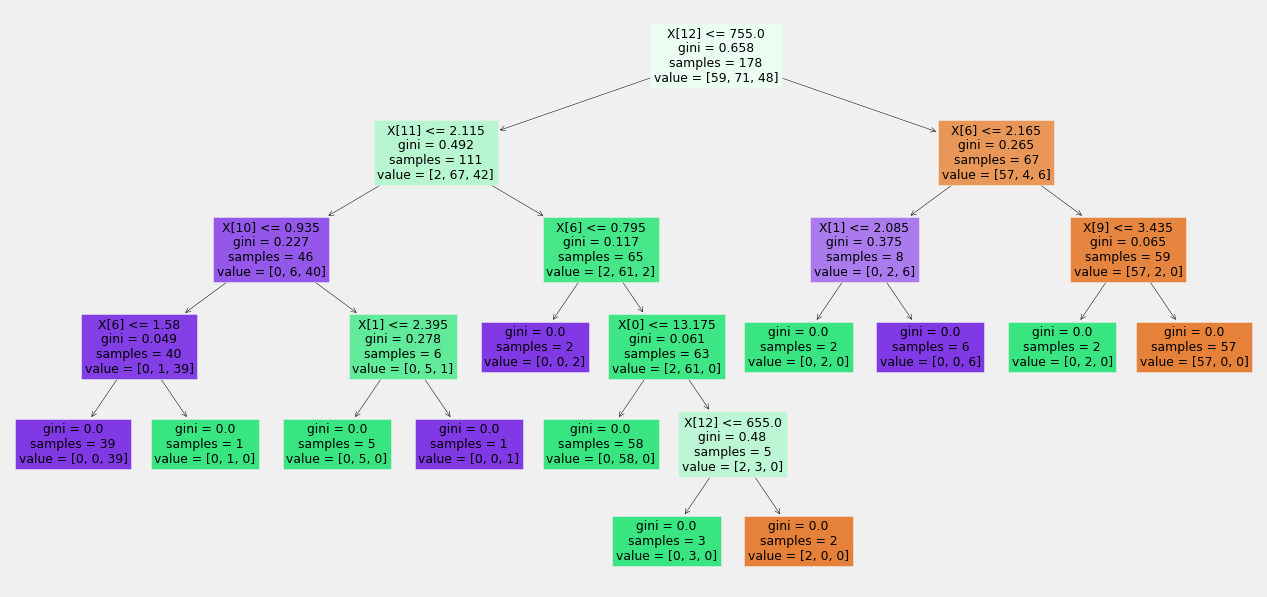

In [16]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = wine.data[:, pair]
    y = wine.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.savefig('decisionsurface.png')
plt.figure(figsize=(20,10))
clf = DecisionTreeClassifier().fit(wine.data, wine.target)
plot_tree(clf, filled=True)
plt.savefig('treestructure.png')
plt.show()

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=500, random_state=322)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=322)

In [27]:
rfc.score(X_test, y_test)

0.9814814814814815

In [28]:
np.mean(cross_val_score(rfc, X, y, cv=5))

0.9777777777777779

In [29]:
rfc.feature_importances_

array([0.14105481, 0.04353253, 0.01586979, 0.02193135, 0.03007167,
       0.05342419, 0.17341999, 0.01293069, 0.02233417, 0.13985328,
       0.06513544, 0.11344051, 0.16700158])

<Figure size 360x360 with 0 Axes>

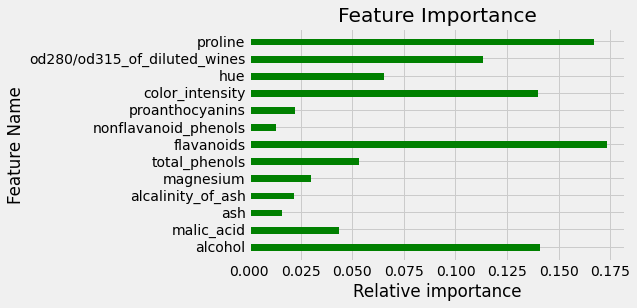

<Figure size 360x360 with 0 Axes>

In [30]:
col = data.columns[:-1]
y = rfc.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature Importance')
plt.xlabel('Relative importance')
plt.ylabel('Feature Name') 
plt.figure(figsize=(5,5))

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=2, max_features=6, 
                                 learning_rate=0.75, random_state=322)

In [33]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.75, max_depth=2, max_features=6,
                           n_estimators=500, random_state=322)

In [34]:
gbc.score(X_test, y_test)

0.9629629629629629

In [39]:
np.mean(cross_val_score(gbc, X, y, cv=5))

0.9888888888888889